# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [4]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

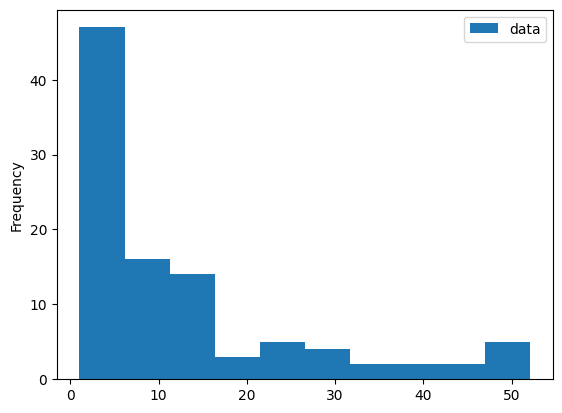

In [5]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

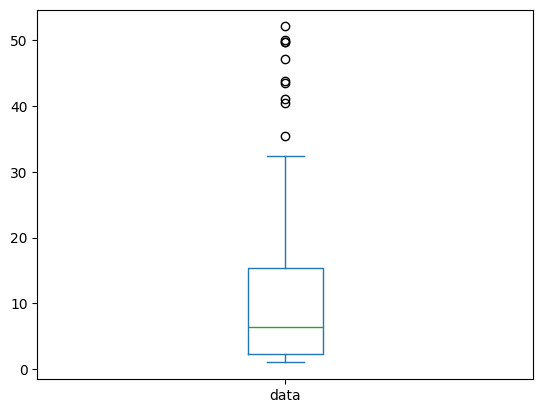

In [6]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

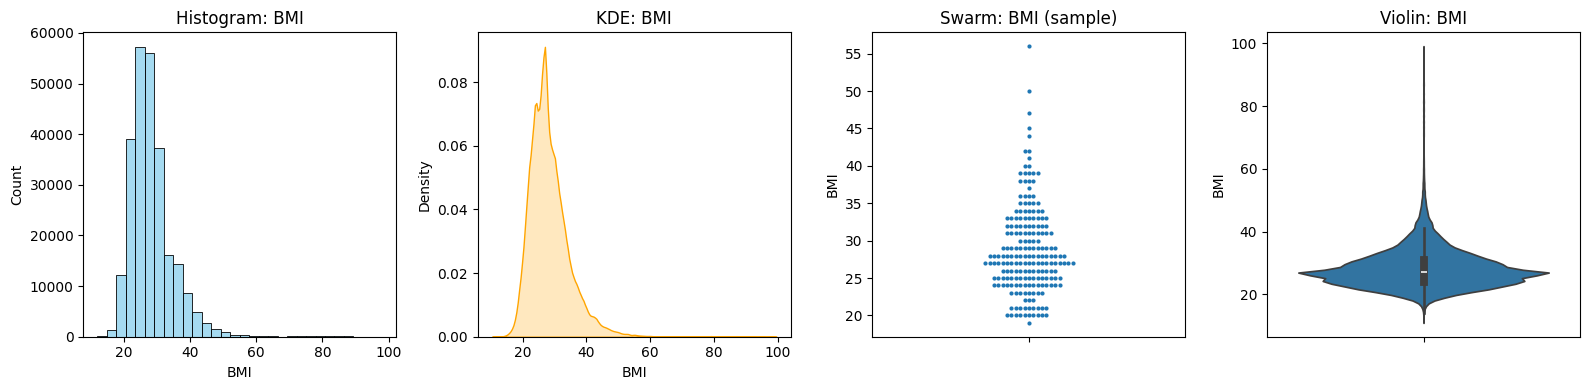

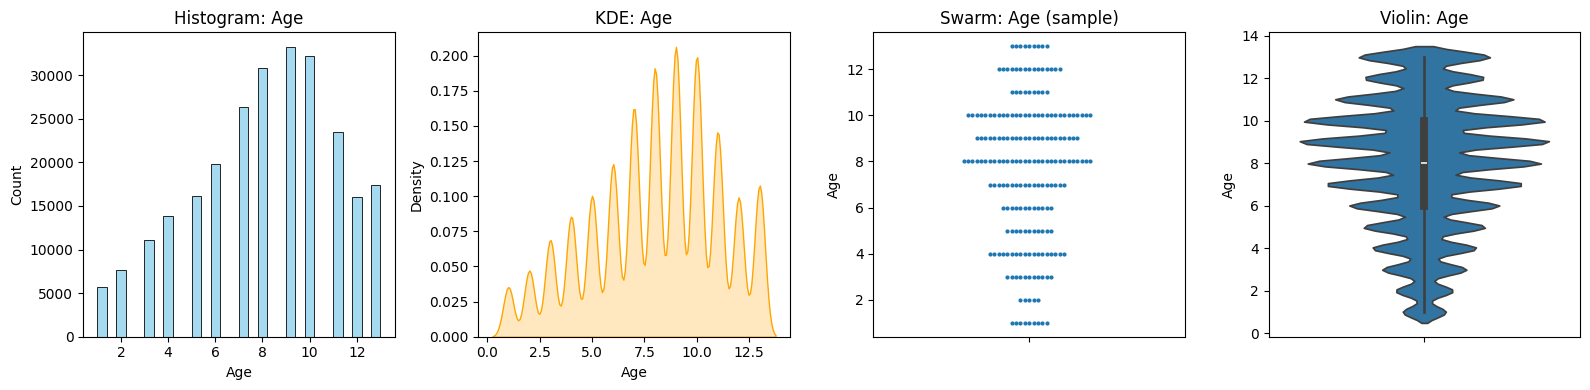

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


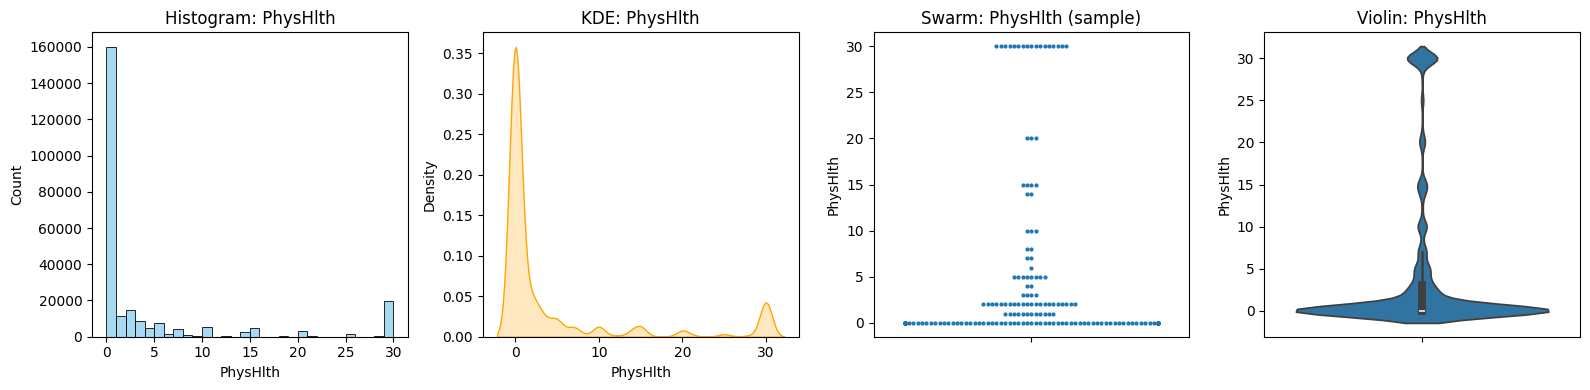

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
features = ['BMI', 'Age', 'PhysHlth']

for col in features:
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[col], bins=30, kde=False, color='skyblue')
    plt.title(f'Histogram: {col}')

    # KDE Plot
    plt.subplot(1, 4, 2)
    sns.kdeplot(df[col], fill=True, color='orange')
    plt.title(f'KDE: {col}')

    # Swarm Plot
    plt.subplot(1, 4, 3)
    try:
        sns.swarmplot(y=col, data=df.sample(200), size=3)
        plt.title(f'Swarm: {col} (sample)')
    except:
        plt.text(0.5, 0.5, "Too many values for swarm", ha='center')

    # Violin Plot
    plt.subplot(1, 4, 4)
    sns.violinplot(y=col, data=df)
    plt.title(f'Violin: {col}')

    plt.tight_layout()
    plt.show()



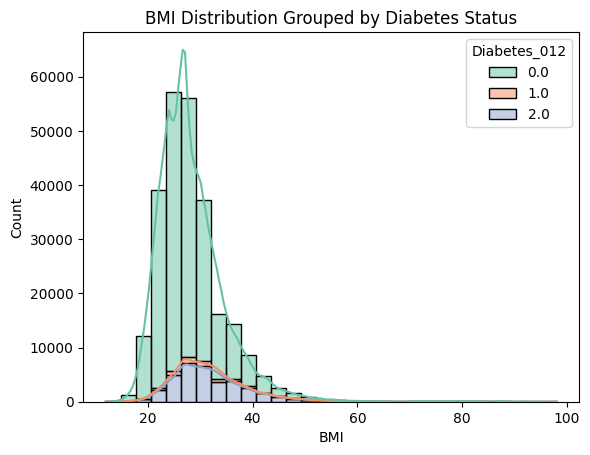

In [10]:
sns.histplot(data=df, x="BMI", hue="Diabetes_012", bins=30, kde=True, multiple="stack", palette="Set2")
plt.title("BMI Distribution Grouped by Diabetes Status")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()


/tmp/ipykernel_12203/4190770452.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Smoker", data=df, palette="pastel")


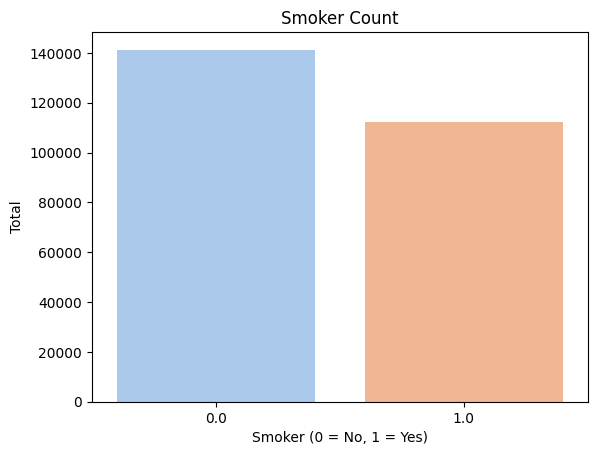

In [11]:
sns.countplot(x="Smoker", data=df, palette="pastel")
plt.title("Smoker Count")
plt.xlabel("Smoker (0 = No, 1 = Yes)")
plt.ylabel("Total")
plt.show()


📈 Distribution Shape:
BMI and Age are slightly right-skewed (more small values, long tail on the right).

PhysHlth shows a bimodal shape — many people report either 0 or very high physical health problems.

❗ Are there outliers?
Yes, some people have BMI > 60, and PhysHlth = 30 (max value). These are likely real but rare.

🔁 Group Comparisons:
People with diabetes (category 2) tend to have higher BMI and worse physical health.

Non-diabetics (category 0) usually have lower BMI and better physical health.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

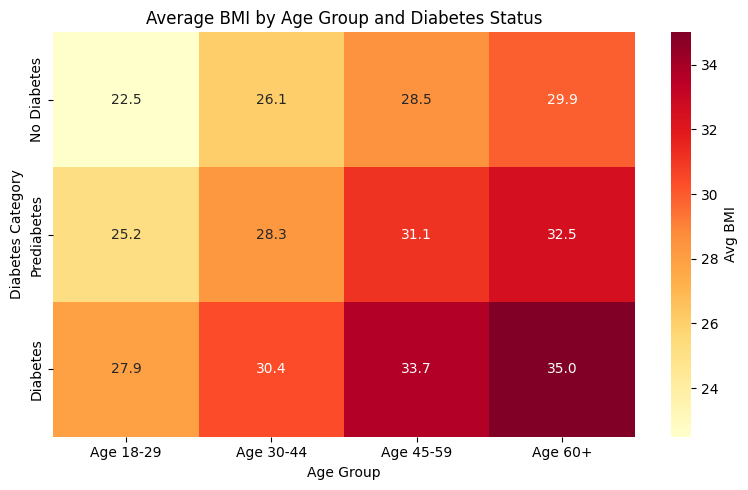

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate some data (average BMI by Age Group and Diabetes Category)
data = {
    'Age 18-29': [22.5, 25.2, 27.9],
    'Age 30-44': [26.1, 28.3, 30.4],
    'Age 45-59': [28.5, 31.1, 33.7],
    'Age 60+':   [29.9, 32.5, 35.0]
}

# Rows represent diabetes status: 0 = No diabetes, 1 = Prediabetes, 2 = Diabetes
index = ['No Diabetes', 'Prediabetes', 'Diabetes']
heatmap_df = pd.DataFrame(data, index=index)

# Create the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_df, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': 'Avg BMI'})

# Add titles and labels
plt.title("Average BMI by Age Group and Diabetes Status")
plt.xlabel("Age Group")
plt.ylabel("Diabetes Category")

plt.tight_layout()
plt.show()
